In [ ]:
# 동물 종류 6가지로 늘려서 분류 모델 만들어보기
# 데이터 -> \\192.168.0.21\ai

In [ ]:
import tensorflow_hub as hub

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pl
import matplotlib.pylab as pt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
md = tf.keras.Sequential([  # 층 추가 후 모델 생성
    
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape = (224, 224, 3),
                   trainable = False),
                   tf.keras.layers.Dense(6, activation = 'softmax')
])

In [ ]:
md.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              58331648  
                                                                 
 dense_5 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 58,343,942
Trainable params: 12,294
Non-trainable params: 58,331,648
_________________________________________________________________


In [ ]:
batch = 32
img_h = 224
img_w = 224
train = "drive/MyDrive/DeepLearning/animal/train/"
valid = "drive/MyDrive/DeepLearning/animal/validation/"

tr = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 10,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    shear_range = 0.1,
                    zoom_range = 0.1
)

tr_generator = tr.flow_from_directory(
                    train,
                    target_size = (img_h, img_w),
                    color_mode = "rgb",
                    batch_size = batch,
                    seed = 7,
                    shuffle = True,
                    class_mode = "categorical")

vl = ImageDataGenerator( rescale = 1.0/255.0 )

vl_generator = vl.flow_from_directory(
                    valid,
                    target_size = (img_h, img_w),
                    color_mode = "rgb",
                    batch_size = batch,
                    seed = 7,
                    shuffle = True,
                    class_mode = "categorical")

Found 1200 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [ ]:
md.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = md.fit(tr_generator, epochs = 7, validation_data = vl_generator, verbose = 1)

Epoch 1/7
38/38 [==============================] - 779s 20s/step - loss: 0.5320 - accuracy: 0.8408 - val_loss: 0.0768 - val_accuracy: 0.9767
Epoch 2/7
38/38 [==============================] - 23s 615ms/step - loss: 0.0542 - accuracy: 0.9858 - val_loss: 0.0586 - val_accuracy: 0.9767
Epoch 3/7
38/38 [==============================] - 22s 588ms/step - loss: 0.0349 - accuracy: 0.9925 - val_loss: 0.0541 - val_accuracy: 0.9833
Epoch 4/7
38/38 [==============================] - 23s 610ms/step - loss: 0.0283 - accuracy: 0.9933 - val_loss: 0.0536 - val_accuracy: 0.9867
Epoch 5/7
38/38 [==============================] - 23s 591ms/step - loss: 0.0153 - accuracy: 0.9983 - val_loss: 0.0500 - val_accuracy: 0.9900
Epoch 6/7
38/38 [==============================] - 22s 589ms/step - loss: 0.0154 - accuracy: 0.9958 - val_loss: 0.0489 - val_accuracy: 0.9900
Epoch 7/7
38/38 [==============================] - 23s 616ms/step - loss: 0.0126 - accuracy: 0.9983 - val_loss: 0.0456 - val_accuracy: 0.9900


Text(0.5, 1.0, 'loss')

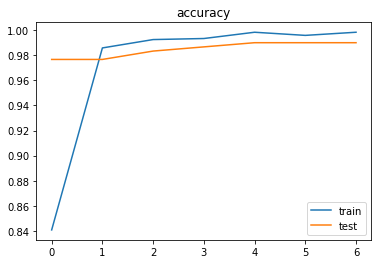

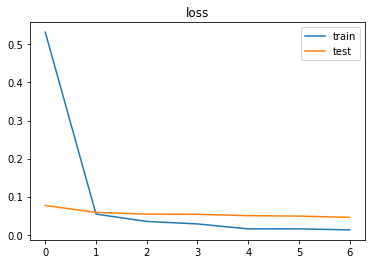

In [ ]:
accuracy = hist.history['accuracy']         # 그래프 그리기
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

pt.plot(epochs, accuracy, label="train")
pt.plot(epochs, val_accuracy, label="test")
pt.legend()
pt.title('accuracy')
pt.figure()

pt.plot(epochs, loss, label="train")
pt.plot(epochs, val_loss, label="test")
pt.legend()
pt.title('loss')

1/1 [==============================] - 2s 2s/step


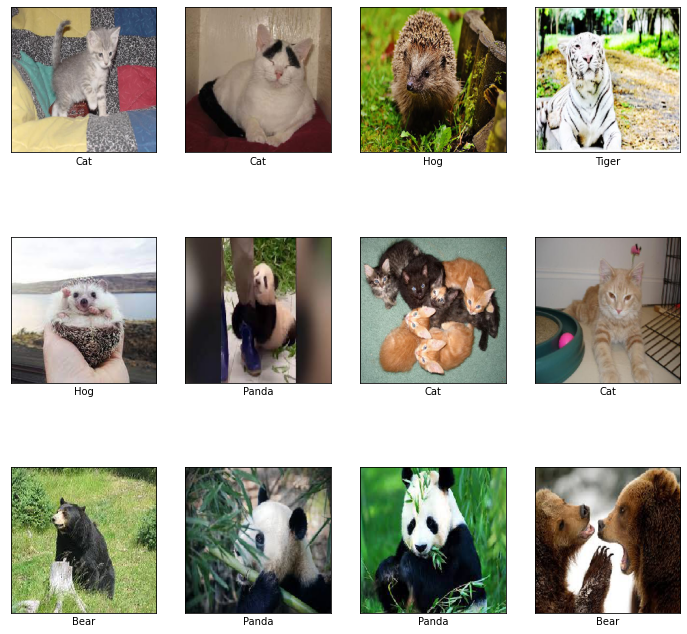

In [ ]:
cn = ['Bear', 'Cat', 'Dog', 'Hog', 'Panda', 'Tiger']
valid, lbl_batch = next(iter(vl_generator))
pred = md.predict(valid)
pred = np.argmax(pred, axis = 1)

fig = pt.figure(figsize = (12,12))

for i in range(12):
    
    pt.subplot(3, 4, i+1)
    pt.imshow(valid[i])
    pt.xticks(ticks = [])
    pt.yticks(ticks = [])
    
  
    pt.xlabel(cn[pred[i]])

In [ ]:
batch = 32
img_h = 224
img_w = 224
te_dir = "drive/MyDrive/DeepLearning/TEST/"

te = ImageDataGenerator( rescale = 1.0/255.0 )

test = te.flow_from_directory(
                    te_dir,
                    target_size = (img_h, img_w),
                    color_mode = "rgb",
                    batch_size = batch,
                    seed = 7,
                    shuffle = True,
                    class_mode = "categorical")

Found 36 images belonging to 1 classes.


1/1 [==============================] - 2s 2s/step


IndexError: ignored

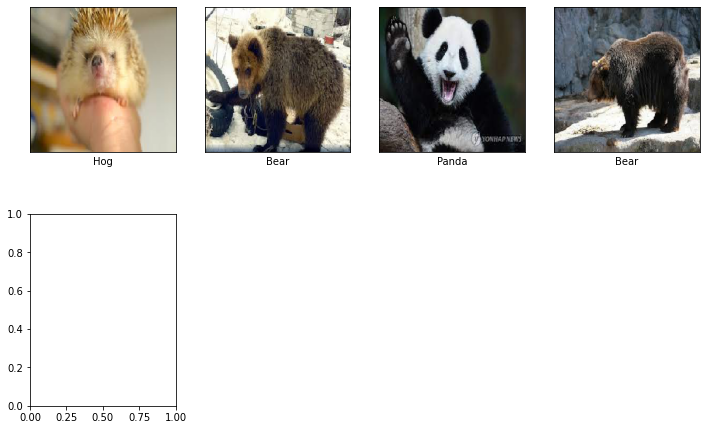

In [ ]:
cn = ['Bear', 'Cat', 'Dog', 'Hog', 'Panda', 'Tiger']
test_data, lbl_batch = next(iter(test))
pred = md.predict(test_data)
pred = np.argmax(pred, axis = 1)

fig = pt.figure(figsize = (12,12))

for i in range(12):
    
    pt.subplot(3, 4, i+1)
    pt.imshow(test_data[i])
    pt.xticks(ticks = [])
    pt.yticks(ticks = [])
    
    pt.xlabel(cn[pred[i]])

In [ ]:
# AlexNet으로 구성해보기

In [ ]:
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
nc = 6

class AlexNet(Sequential):
    
    def __init__(self, input_shape, nc):
        
        super().__init__()
        
        self.add(Conv2D(96, kernel_size = (11, 11), strides = 4, padding = 'valid', activation = 'relu',
                        input_shape = input_shape, kernel_initializer = 'he_normal'))
        self.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = "valid", data_format = "channels_last"))
        
        self.add(Conv2D(256, kernel_size = (5, 5), strides = 1, padding = 'same', activation = 'relu',
                        kernel_initializer = 'he_normal')) # 가중치 초기화 방법으로 kernel_initializer 사용
        self.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = "valid", data_format = "channels_last"))
        
        self.add(Conv2D(384, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu',
                        kernel_initializer = 'he_normal'))
        self.add(Conv2D(384, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu',
                        kernel_initializer = 'he_normal'))
        self.add(Conv2D(256, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu',
                        kernel_initializer = 'he_normal'))
        
        self.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = "valid", data_format = "channels_last"))
        # data_format = 입력에 대한 형식 지정
        # channels_last -> 배치크기, 높이, 너비, 채널개수
        # channels_first -> 배치크기, 채널개수, 높이, 너비
        
        self.add(Flatten())
        self.add(Dense(4096, activation = 'relu'))
        self.add(Dense(4096, activation = 'relu'))
        self.add(Dense(1000, activation = 'relu'))
        self.add(Dense(nc, activation = 'softmax'))
        
        self.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
input_shape = (100, 100, 3) 

md = AlexNet(input_shape, nc)
md.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 384)         132

In [ ]:
batch = 32
img_h = 100
img_w = 100
t_dir = "drive/MyDrive/DeepLearning/animal/train/"
v_dir = "drive/MyDrive/DeepLearning/animal/validation/"

tr = ImageDataGenerator(
    
    rescale = 1/255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1

)

train = tr.flow_from_directory( t_dir,
                                target_size = (img_h, img_w),
                                color_mode = "rgb",
                                batch_size = batch,
                                seed = 1,
                                shuffle = True,
                                class_mode = "categorical")

vl = ImageDataGenerator( rescale = 1/255 )

valid = vl.flow_from_directory( v_dir,
                                target_size = (img_h, img_w),
                                color_mode = "rgb",
                                batch_size = batch,
                                seed = 1,
                                shuffle = True,
                                class_mode = "categorical")

tn = train.samples
vn = valid.samples

Found 866 images belonging to 6 classes.
Found 247 images belonging to 6 classes.


In [ ]:
log_dir = "drive/MyDrive/DeepLearing/"
t_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1, profile_batch = 0)

md.fit(train, epochs = 10, steps_per_epoch = tn//batch, validation_data = valid, validation_steps = vn//batch, callbacks = [t_callback], verbose = 1)

Epoch 1/10
27/27 [==============================] - 10s 380ms/step - loss: 1.6219 - accuracy: 0.2074 - val_loss: 1.6358 - val_accuracy: 0.2009
Epoch 2/10
27/27 [==============================] - 10s 388ms/step - loss: 1.5973 - accuracy: 0.2122 - val_loss: 1.6324 - val_accuracy: 0.1875
Epoch 3/10
27/27 [==============================] - 10s 374ms/step - loss: 1.6016 - accuracy: 0.2266 - val_loss: 1.7679 - val_accuracy: 0.2321
Epoch 4/10
27/27 [==============================] - 11s 432ms/step - loss: 1.5940 - accuracy: 0.2194 - val_loss: 1.6454 - val_accuracy: 0.2054
Epoch 5/10
27/27 [==============================] - 10s 374ms/step - loss: 1.5951 - accuracy: 0.2362 - val_loss: 1.6336 - val_accuracy: 0.2188
Epoch 6/10
27/27 [==============================] - 10s 373ms/step - loss: 1.5925 - accuracy: 0.1942 - val_loss: 1.6435 - val_accuracy: 0.2143
Epoch 7/10
27/27 [==============================] - 10s 374ms/step - loss: 1.5870 - accuracy: 0.2350 - val_loss: 1.6245 - val_accuracy: 0.2143

1/1 [==============================] - 0s 140ms/step


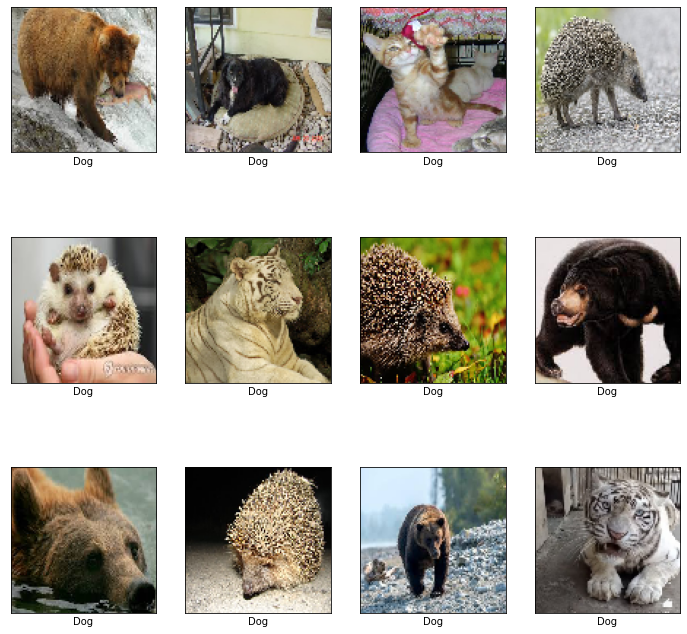

In [ ]:
cn = ['Bear', 'Cat', 'Dog', 'Hog', 'Panda', 'Tiger']
val, lbl_batch = next(iter(valid))
pred = md.predict(val)
pred = np.argmax(pred, axis = 1)

fig = pt.figure(figsize = (12,12))

for i in range(12):
    
    pt.subplot(3, 4, i+1)
    pt.imshow(val[i])
    pt.xticks(ticks = [])
    pt.yticks(ticks = [])
    
    pt.xlabel(cn[pred[i]])